# Titanic data analisys


## Background information

The first trip of the Titanic from Southampton to New-York happened in the beginning of the 20th century. The purpose of this study is to explore a dataset available on the Kaggle website. This dataset is a sample of the 2224 passengers and crew that were aboard the Titanic. The size of the dataset is 891.

The description of the variables from the Kaggle website is:
>VARIABLE DESCRIPTIONS:  
survival        Survival
                (0 = No; 1 = Yes)  
pclass          Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)  
name            Name  
sex             Sex  
age             Age  
sibsp           Number of Siblings/Spouses Aboard  
parch           Number of Parents/Children Aboard  
ticket          Ticket Number  
fare            Passenger Fare  
cabin           Cabin  
embarked        Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)  





## Organisation of the study

The following report will try to answer the following questions:  
**Who are the people on-board of Titanic?**  
**Was the sentence "Women and Children first" respected?**  
**What are the main parameters that could lead to a higher survival rate?**  
**Does men having relative on-board make their survival rate higher or lower**  



### Initial data exploration

The initial step for this analysis was to get an overview of the data available. The first step I made was to look at the head part of the dataset. In the "Cabin" column, it can be seen that some missing data are to be expected. However, a missing value in the cabin column does not look a big deal because without a map of the cabin location on the boat, I can't see any use for it.  
My next step is then to use the "describe" function in order to check whether all the numerical fields are complete or not.

In [3]:

import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline

raw_titanic_data=pd.read_csv("titanic-data.csv")

raw_titanic_data.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


From the "describe" function, several remarks can be done:
1. There is something wrong in the "Age" column
2. The minimum fare for men is zero. What does it mean? Is it an indicator for a crew member? Does it mean this person was on-board illegally. Does it mean the travel is free for kids under a certain age?

Concerning the age, I looked at the value in the "Age" series that were "NaN". There are 177 rows that are missing the age information. I will create a dataset without those rows. Once having removed the rows without Age information, there is no more Fare equal to zero.  
Concerning the fare indication, there are 15 rows were the fare is equal to zero. As there is no clear explanation for these rows, I perfer to remove them from the dataset.  
In the following of the study, I will use this dataset (without the Fare=0 rows). When I will need age information, I will use, the one without the rows with Age=NaN


In [4]:
print len(raw_titanic_data)

print raw_titanic_data.groupby(["Sex"]).describe()

# Number of row without proper age indication
nb_age_missing=len(raw_titanic_data[np.isnan(raw_titanic_data["Age"])])
nb_age_av=len(raw_titanic_data[raw_titanic_data["Age"]>0.])
total_age=nb_age_missing+nb_age_av
print nb_age_missing,nb_age_av,total_age

# New dataset without missing age information
titanic_data_age=raw_titanic_data[~np.isnan(raw_titanic_data["Age"])]
print titanic_data_age.groupby(["Sex"]).describe()


# Number of row with fare = 0.
nb_fare_0=len(raw_titanic_data[(raw_titanic_data["Fare"]==0.)])
nb_fare=len(raw_titanic_data[(raw_titanic_data["Fare"]>0.)])
total_fare=nb_fare_0+nb_fare
print nb_fare_0,nb_fare,total_fare

# New working dataset
titanic_data=raw_titanic_data[raw_titanic_data["Fare"]>0.]




891
                     Age        Fare       Parch  PassengerId      Pclass  \
Sex                                                                         
female count  261.000000  314.000000  314.000000   314.000000  314.000000   
       mean    27.915709   44.479818    0.649682   431.028662    2.159236   
       std     14.110146   57.997698    1.022846   256.846324    0.857290   
       min      0.750000    6.750000    0.000000     2.000000    1.000000   
       25%           NaN   12.071875    0.000000   231.750000    1.000000   
       50%           NaN   23.000000    0.000000   414.500000    2.000000   
       75%           NaN   55.000000    1.000000   641.250000    3.000000   
       max     63.000000  512.329200    6.000000   889.000000    3.000000   
male   count  453.000000  577.000000  577.000000   577.000000  577.000000   
       mean    30.726645   25.523893    0.235702   454.147314    2.389948   
       std     14.678201   43.138263    0.612294   257.486139    0.81358

Once the dataset has been cleaned, I draw the age distribution of the sample in order to get an idea of the population on board of the Titanic. At this stage several remarks can be done:
1. There is much more Adult men than Adult women
2. There is approximatly an equal number of kid male and female
3. People on board are relatively young for our standard (mean around 30 years old)

                     Age        Fare       Parch  PassengerId      Pclass  \
Sex                                                                         
female count  261.000000  261.000000  261.000000   261.000000  261.000000   
       mean    27.915709   47.582759    0.708812   440.199234    2.065134   
       std     14.110146   61.346854    1.066752   260.607601    0.845560   
       min      0.750000    6.750000    0.000000     2.000000    1.000000   
       25%     18.000000   13.000000    0.000000   234.000000    1.000000   
       50%     27.000000   26.000000    0.000000   428.000000    2.000000   
       75%     37.000000   57.979200    1.000000   652.000000    3.000000   
       max     63.000000  512.329200    6.000000   888.000000    3.000000   
male   count  453.000000  453.000000  453.000000   453.000000  453.000000   
       mean    30.726645   27.268836    0.271523   453.412804    2.335541   
       std     14.678201   45.841889    0.651076   258.423367    0.818748   

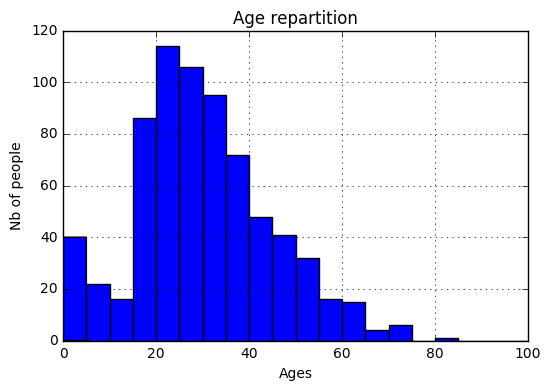

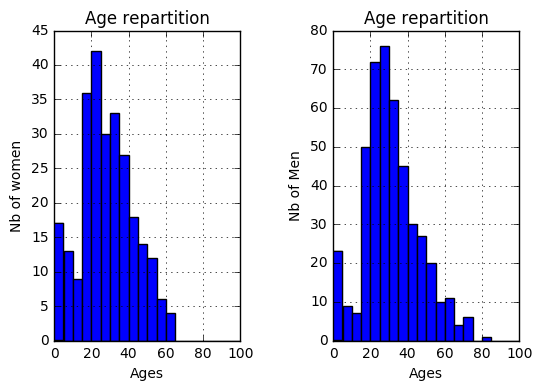

In [5]:
ages=titanic_data_age["Age"]
ages_female=titanic_data_age[titanic_data_age["Sex"]=="female"]["Age"]
ages_male=titanic_data_age[titanic_data_age["Sex"]=="male"]["Age"]

print titanic_data_age.groupby(["Sex"]).describe()

# PLot histogram Age -full sample
fig1=plt.figure()
bins = np.linspace(0, 100, 21)
ages.hist(bins=bins)
plt.xlabel("Ages")
plt.ylabel("Nb of people")
plt.title("Age repartition")

# PLot histogram Age - Women and Men separated
fig2, axarr1 =plt.subplots(1,2)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=None)

ages_female.hist(ax=axarr1[0],bins=bins)
axarr1[0].set_xlabel("Ages")
axarr1[0].set_ylabel("Nb of women")
axarr1[0].set_title("Age repartition")
ages_male.hist(ax=axarr1[1],bins=bins)
axarr1[1].set_xlabel("Ages")
axarr1[1].set_ylabel("Nb of Men")
axarr1[1].set_title("Age repartition")


In the next part, I will focus on where the people have embarked and in which Class they will travel and whether they travel with some relatives or not. For the last point, I created an additional column in the dataset named "nb_relative" which is the sum of the column "Sibsp" with "Parch".  
The conclusions of the 3 first sets of pie chart are:
1. Around $3\over{4}$ of the passengers have embarked from Southhampton
2. People embarking in Cherbourg are mainly travelling in first class whereas people embarking from southampton and Queenstown are majoritary travelling in $3^{rd}$ class.
3. A bigger proportion of people embarked in Cherbourg are travelling with relatives whereas people embarked in Queenstown and Southampton are travelling alone. 

The remarks 2 and 3 may indicates that a proportion of the people embarked in Cherbourg haven't the same purpose than the one general one. For example, a proportion with money coming from Cherbourg would travel for pleasure with all their family whereas most of the other people are travelling cheap and alone to build their live in New-York. 
The last 2 sets of pie chart show that in this sample women are less travelling alone than men. 

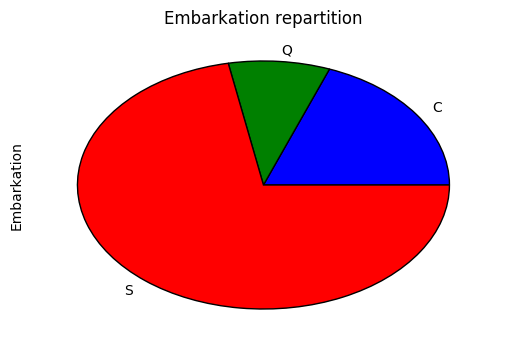

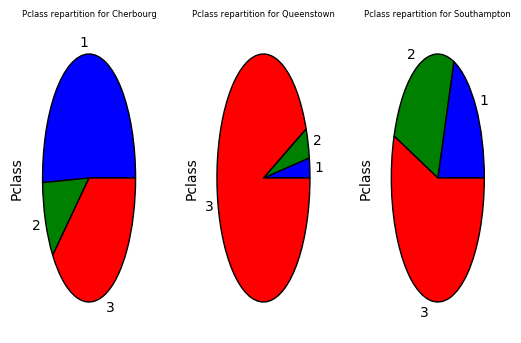

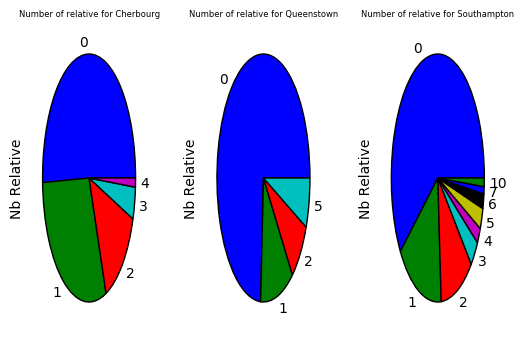

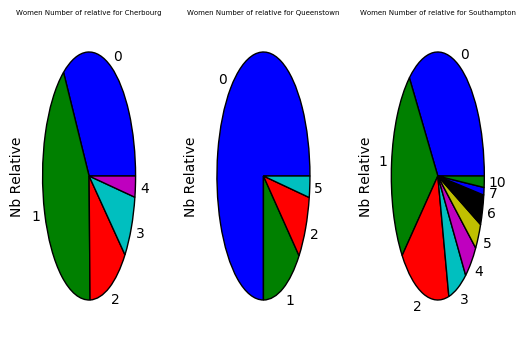

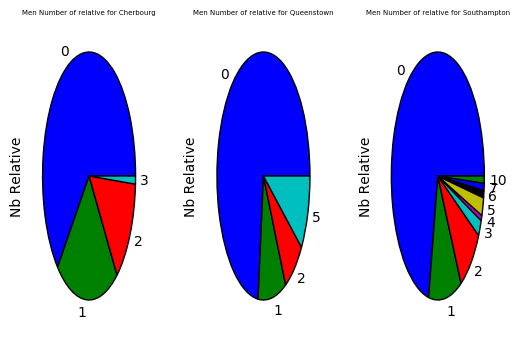

In [6]:

port=["C","Q","S"]
Pclass=[1,2,3]

dict_port={"C":"Cherbourg","Q":"Queenstown","S":"Southampton"}

total_per_emb=titanic_data.groupby("Embarked").size()

# Pie chart People sample embarkation origin
fig1=plt.figure()
total_per_emb.plot(kind="pie")
plt.ylabel("Embarkation")
plt.title("Embarkation repartition")

# Pie chart people travelling class per embarkation origin
fig1, axarr1 =plt.subplots(1,len(port))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=None)

for i in range(len(port)):
    total_per_emb=titanic_data[(titanic_data["Embarked"]==port[i])]
    total_per_emb_per_class=total_per_emb.groupby("Pclass").size()
    total_per_emb_per_class.plot(ax=axarr1[i],kind="pie")
    axarr1[i].set_title("Pclass repartition for %s"%(dict_port[port[i]]),size=6)
    axarr1[i].set_ylabel("Pclass")

# creation of nb_relative on a copy of the original dataset
#raw_titanic_data["nb_relative"]=raw_titanic_data["SibSp"]+raw_titanic_data["Parch"]
titanic_data_loc=titanic_data.copy()
titanic_data_loc["nb_relative"]=titanic_data_loc["SibSp"]+titanic_data_loc["Parch"]

# Pie chart people number of relatives per embarkation origin   
fig2, axarr2 =plt.subplots(1,len(port))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=None)

for i in range(len(port)):
    total_per_emb=titanic_data_loc[(titanic_data_loc["Embarked"]==port[i])]
    total_per_emb_per_relative=total_per_emb.groupby("nb_relative").size()
    total_per_emb_per_relative.plot(ax=axarr2[i],kind="pie")
    axarr2[i].set_title("Number of relative for %s"%(dict_port[port[i]]),size=6)
    axarr2[i].set_ylabel("Nb Relative")

# Pie chart Women number of relatives per embarkation origin     
fig3, axarr3 =plt.subplots(1,len(port))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=None)

for i in range(len(port)):
    total_per_emb=titanic_data_loc[(titanic_data_loc["Embarked"]==port[i]) & (titanic_data_loc["Sex"]=="female")]
    total_per_emb_per_relative=total_per_emb.groupby("nb_relative").size()
    total_per_emb_per_relative.plot(ax=axarr3[i],kind="pie")
    axarr3[i].set_title("Women Number of relative for %s"%(dict_port[port[i]]),size=5)
    axarr3[i].set_ylabel("Nb Relative")    

# Pie chart Men number of relatives per embarkation origin     
fig4, axarr4 =plt.subplots(1,len(port))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=None)

for i in range(len(port)):
    total_per_emb=titanic_data_loc[(titanic_data_loc["Embarked"]==port[i]) & (titanic_data_loc["Sex"]=="male")]
    total_per_emb_per_relative=total_per_emb.groupby("nb_relative").size()
    total_per_emb_per_relative.plot(ax=axarr4[i],kind="pie")
    axarr4[i].set_title("Men Number of relative for %s"%(dict_port[port[i]]),size=5)
    axarr4[i].set_ylabel("Nb Relative")   


The mean price for a first class travel was around 106\$ for a woman whereas it was around 70\$ for a man. For a second class travel the price was similar for men and women around 21\$ and for a third class travel the price was around 16\$ for women and 13\$ for men.  
Let's check with a one-tail t-test wether this hypothesis statistically relevant or not for the complete set of passenger on the Titanic. 
>The Null hypothesis would be: the price in dollar for a first class trip for a woman is lower or equal to the one for a man
The Alternative Hypothesis would be: the price in dollar for a first class trip for a woman is higher to the one for a man  
$H_0: \mu_1-\mu_2 \leq 0$  
$H_A: \mu_1-\mu_2 \gt 0$  
With $\mu_1$ the mean price for a trip in first class for a woman and $\mu_2$ the mean price for a trip in first class for a man 
The samples are independents.  
The size of the samples are $n_1=94$ for women and $n_2=117$ for men. The number of degree of freedom is then $df=n_1+n_2-2$ which gives $df=209$. The $\alpha$-level I chose for the confidence level is $\alpha=0.05$. From a t-critical value calculator(http://www.mathcracker.com/t_critical_values.php), I got $t_{critical}=1.652$.  
The value for my test is $t_{value}=0.47$. Therefore, I failed to reject the null hypothesis.


Pclass  Sex          
1       female  count     94.000000
                mean     106.125798
                std       74.259988
                min       25.929200
                25%       57.244800
                50%       82.664550
                75%      134.500000
                max      512.329200
        male    count    117.000000
                mean      70.099038
                std       77.908806
                min        5.000000
                25%       29.700000
                50%       49.504200
                75%       79.200000
                max      512.329200
2       female  count     76.000000
                mean      21.970121
                std       10.891796
                min       10.500000
                25%       13.000000
                50%       22.000000
                75%       26.062500
                max       65.000000
        male    count    102.000000
                mean      20.903064
                std       14.539137
      

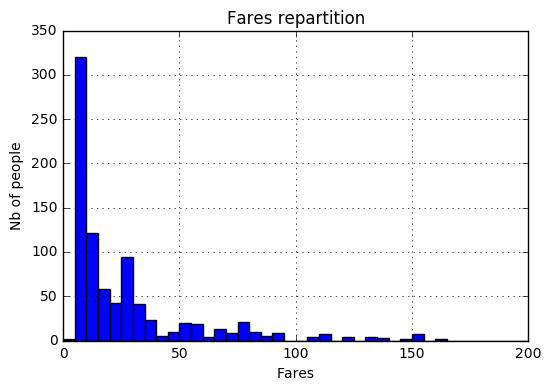

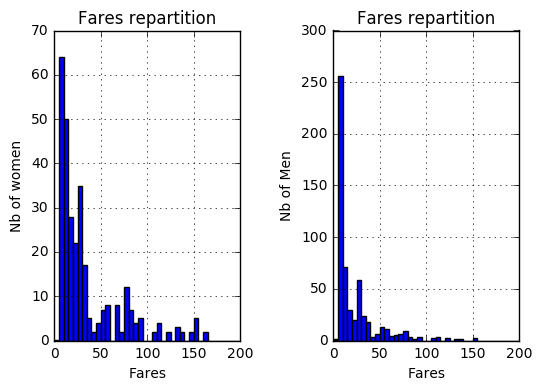

In [7]:
fares=titanic_data["Fare"]
fares_female=titanic_data[titanic_data["Sex"]=="female"]["Fare"]
fares_male=titanic_data[titanic_data["Sex"]=="male"]["Fare"]

print titanic_data.groupby(["Pclass","Sex"]).describe()["Fare"]

# Histogram of Fare
fig1=plt.figure()
bins = np.linspace(0, 200, 41)
fares.hist(bins=bins)
plt.xlabel("Fares")
plt.ylabel("Nb of people")
plt.title("Fares repartition")

# Histogram of Fare of Women and Men
fig2, axarr1 =plt.subplots(1,2)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=None)

fares_female.hist(ax=axarr1[0],bins=bins)
axarr1[0].set_xlabel("Fares")
axarr1[0].set_ylabel("Nb of women")
axarr1[0].set_title("Fares repartition")
fares_male.hist(ax=axarr1[1],bins=bins)
axarr1[1].set_xlabel("Fares")
axarr1[1].set_ylabel("Nb of Men")
axarr1[1].set_title("Fares repartition")

In [8]:
# Statistical test: First class fare for women higher than for men?

fares_female_first=titanic_data[(titanic_data["Sex"]=="female")& (titanic_data["Pclass"]==1)]["Fare"]
fares_male_first=titanic_data[(titanic_data["Sex"]=="male")& (titanic_data["Pclass"]==1)]["Fare"]

# Degree of Freedom
print len(fares_female_first),len(fares_male_first)
df=len(fares_female_first)+len(fares_male_first)-2
print "df=",df

print fares_female_first.mean(),fares_male_first.mean()

# Calculation of Pooled variance
SS1=((fares_female_first-fares_female_first.mean())*(fares_female_first-fares_female_first.mean())).sum()
SS2=((fares_male_first-fares_male_first.mean())*(fares_male_first-fares_male_first.mean())).sum()

Sp=(SS1+SS2)/df
print Sp

# Standard Error
SE=math.sqrt(Sp)

# t-value
tvalue=(fares_female_first.mean()-fares_male_first.mean())/SE
print tvalue


94 117
df= 209
106.125797872 70.0990384615
5822.71525751
0.472130897699


In order to better understand why it is not possible to conclude on a Fare difference between men and women, I plotted boxplot to visualize the mean, the standard deviation, the InterQuartile Range and the outliers. It can be observed that the dispersion of the first class price are high for both men and women and that it is the reason why it is not possible to conclude anything on this subject.

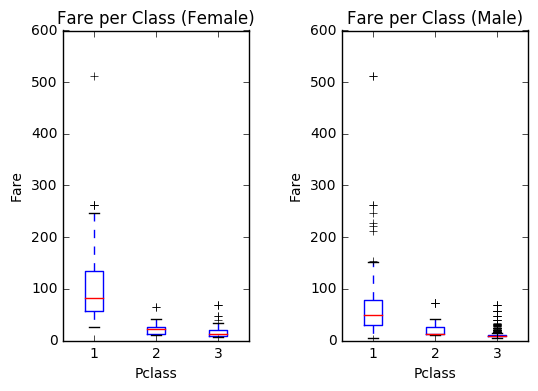

In [9]:
female=titanic_data[titanic_data["Sex"]=="female"]
male=titanic_data[titanic_data["Sex"]=="male"]

f1=female[female["Pclass"]==1]["Fare"]
f2=female[female["Pclass"]==2]["Fare"]
f3=female[female["Pclass"]==3]["Fare"]
m1=male[male["Pclass"]==1]["Fare"]
m2=male[male["Pclass"]==2]["Fare"]
m3=male[male["Pclass"]==3]["Fare"]

# Box plot of fare for each class for women and men
fig1, axarr1 =plt.subplots(1,2)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=None)
axarr1[0].boxplot([f1,f2,f3], vert=True)
axarr1[0].set_xlabel("Pclass")
axarr1[0].set_ylabel("Fare")
axarr1[0].set_title("Fare per Class (Female)")
axarr1[1].boxplot([m1,m2,m3], vert=True)
axarr1[1].set_xlabel("Pclass")
axarr1[1].set_ylabel("Fare")
axarr1[1].set_title("Fare per Class (Male)")



### Who are the people on-board of Titanic?

Based on the initial data exploration, I have now a good idea of the passenger sample proposed in the dataset. The people from the dataset on board of the Titanic were coming mainly from England. A big part of them were men travelling alone in order to build their life in New-York. They were travelling in third class. The population of people embarking from Cherbourg were richer since half of them were travelling in first class. From a general point of view, the population travelling was relatively young (around 30 years old). The number of men is 70% higher than the number of women. The mean price was around 100\$ for a first class trip and the difference of the mean fare between men and women on our sample is not statistically significant for the Titanic complete population

### Was the sentence "Women and Children first" respected?

Now that I have explore the dataset, I will try to answer the question I raised at the beginning. I will consider as  dependant variable wether a person has survived or not.  
The initial question is wether the sentence "Women and Children first" is true or not for the Titanic case. For that, I have filtered several groups in the initial dataset (kids, old women, old men, adult women and adult men) and I have looked constructed the survival rate for each of these groups. Finally, I displayed the data with a bar graph.   
Kids, old women and adult women had a better chance to survive, it means that despite the catastrophic event, kids and women were protected. Even if it could be think that despite their age old people would not survived, it is wrong.




   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked is_kid is_old  
0      0         A/5 21171   7.2500   NaN        S  False  False  
1      0          PC 17599  71.2833   C85        C  False  False  
2      0  STON/O2. 3101282   7.9250   NaN        S  False  False  
3      0            113803  53.1000  C123        S  

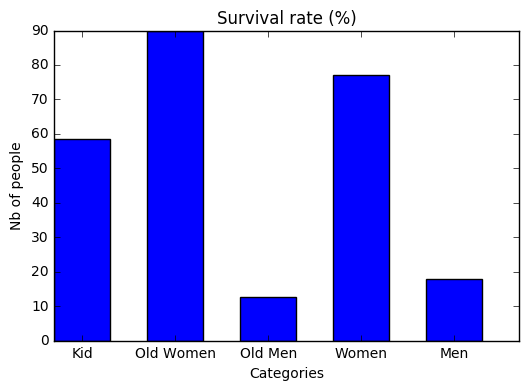

In [11]:
# Function definition for apply
def identify_kids(x):
    val=False
    if x<=14:
        val=True
    return val
      
def identify_elders(x):
    val=False
    if x>=55:
        val=True
    return val

# Copy of the original dataset to add new column
titanic_data_age_loc=titanic_data_age.copy()
titanic_data_age_loc["is_kid"]=titanic_data_age_loc["Age"].apply(identify_kids)
titanic_data_age_loc["is_old"]=titanic_data_age_loc["Age"].apply(identify_elders)
print titanic_data_age_loc.head()

# filtering of the dataset to get the different categories (kid,old women, old men, women, men)
kid=titanic_data_age_loc[(titanic_data_age_loc["is_kid"]==True)]
old_women=titanic_data_age_loc[(titanic_data_age_loc["is_old"]==True)& (titanic_data_age_loc["Sex"]=="female")]
old_men=titanic_data_age_loc[(titanic_data_age_loc["is_old"]==True)& (titanic_data_age_loc["Sex"]=="male")]
women=titanic_data_age_loc[(titanic_data_age_loc["is_old"]==False) &(titanic_data_age_loc["is_kid"]==False) & (titanic_data_age_loc["Sex"]=="female")]
men=titanic_data_age_loc[(titanic_data_age_loc["is_old"]==False) &(titanic_data_age_loc["is_kid"]==False)& (titanic_data_age_loc["Sex"]=="male")]

# Calculation of the number of member for each category 
nb_kid=len(kid.index)
nb_old_w=len(old_women.index)
nb_old_m=len(old_men.index)
nb_women=len(women.index)
nb_men=len(men.index)
print nb_kid,nb_old_w,nb_old_m,nb_women,nb_men

# filtering among the categories of the survivors
kid_survival=kid[(kid["Survived"]==1)]
old_women_survival=old_women[old_women["Survived"]==1]
old_men_survival=old_men[old_men["Survived"]==1]
women_survival=women[women["Survived"]==1]
men_survival=men[men["Survived"]==1]

# Calculation of the number of member for each category 
nb_kid_surv=len(kid_survival.index)
nb_old_w_surv=len(old_women_survival.index)
nb_old_m_surv=len(old_men_survival.index)
nb_women_surv=len(women_survival.index)
nb_men_surv=len(men_survival.index)
print nb_kid_surv,nb_old_w_surv,nb_old_m_surv,nb_women_surv,nb_men_surv

# Bar plot to show the results (%)
fig1, axarr1 =plt.subplots(1,1)
plt.bar([1,2,3,4,5],[float(nb_kid_surv)/nb_kid*100.,float(nb_old_w_surv)/nb_old_w*100.,float(nb_old_m_surv)/nb_old_m*100.,float(nb_women_surv)/nb_women*100.,float(nb_men_surv)/nb_men*100.],width=0.6)
plt.xlabel("Categories")
plt.ylabel("Nb of people")
plt.title("Survival rate (%)")
xTickMarks = ["Kid","Old Women","Old Men","Women","Men"]
axarr1.set_xticks([1.3,2.3,3.3,4.3,5.3])
xtickNames = axarr1.set_xticklabels(xTickMarks)



As a conclusion, yes the sentence "Women and children first" looks very meaningful since women and kids have a survival rate around 70%. On the contrary, men were not likely to survive.

### What are the main parameters that could lead to a higher survival rate?

Up to now, I see that kids and women had a good chance to survive. Let's see now, in the sample of men that survived if it is possible to find a correlation with any other parameters. To start with, I will have a look at the Age histogram of the men that survived.  
At first glance, it looks like whatever the age of men, the survival rate is similar.

count    93.000000
mean     27.276022
std      16.504803
min       0.420000
25%      18.000000
50%      28.000000
75%      36.000000
max      80.000000
Name: Age, dtype: float64


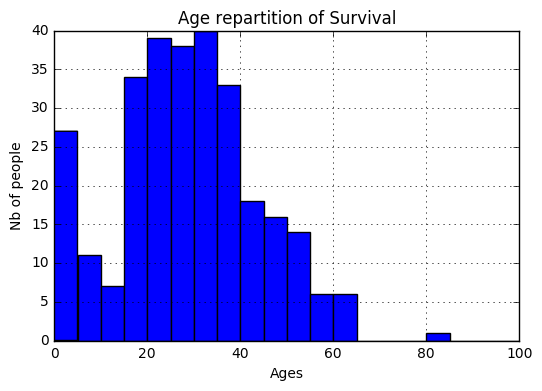

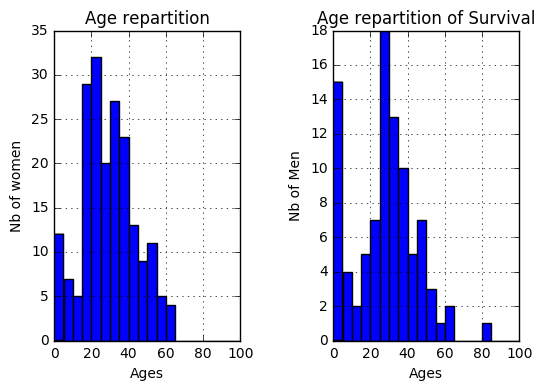

In [12]:

ages_survival=titanic_data_age[titanic_data_age["Survived"]==1]["Age"]
ages_female_survival=titanic_data_age[(titanic_data_age["Sex"]=="female") & (titanic_data_age["Survived"]==1)]["Age"]
ages_male_survival=titanic_data_age[(titanic_data_age["Sex"]=="male") & (titanic_data_age["Survived"]==1)]["Age"]

print ages_male_survival.describe()

# Plot Age histogram for all survivors
fig1=plt.figure()
bins = np.linspace(0, 100, 21)
ages_survival.hist(bins=bins)
plt.xlabel("Ages")
plt.ylabel("Nb of people")
plt.title("Age repartition of Survival")

# Age histogram of women and men survivor
fig2, axarr1 =plt.subplots(1,2)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=None)

ages_female_survival.hist(ax=axarr1[0],bins=bins)
axarr1[0].set_xlabel("Ages")
axarr1[0].set_ylabel("Nb of women")
axarr1[0].set_title("Age repartition")
ages_male_survival.hist(ax=axarr1[1],bins=bins)
axarr1[1].set_xlabel("Ages")
axarr1[1].set_ylabel("Nb of Men")
axarr1[1].set_title("Age repartition of Survival")


To check that the age of male is not linked with a higher survival rate, I draw, the percentage of survivor per Age class.  
On the trend curve, the survival rate for adult men looks almost constant with the age. There is probably no correlation between survival of adult men and age.

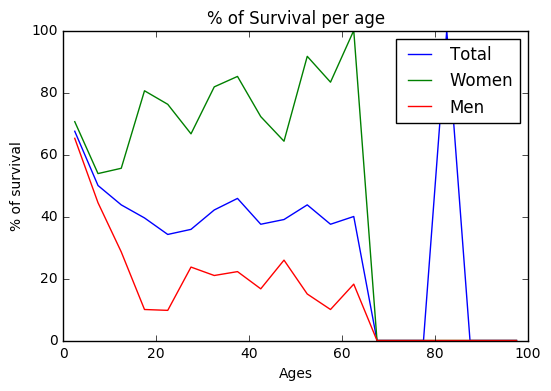

In [13]:
ages_survival=raw_titanic_data[raw_titanic_data["Survived"]==1]["Age"]
ages_female_survival=raw_titanic_data[(raw_titanic_data["Sex"]=="female") & (raw_titanic_data["Survived"]==1)]["Age"]
ages_male_survival=raw_titanic_data[(raw_titanic_data["Sex"]=="male") & (raw_titanic_data["Survived"]==1)]["Age"]

# Function to identify age Class
def identify_age_class(x):
    val=0
    for i in range(20):
        if i*5<=x<(i+1)*5:
            val=i
            break
    return val
 

# Copy of original dataset
titanic_data_age_loc=titanic_data_age.copy()
titanic_data_age_loc["age_class"]=titanic_data_age_loc["Age"].apply(identify_age_class)

# Filtering of dataset
age_class=titanic_data_age_loc.groupby("age_class").size()
female_per_age_class=titanic_data_age_loc[(titanic_data_age_loc["Sex"]=="female")].groupby("age_class").size()
male_per_age_class=titanic_data_age_loc[(titanic_data_age_loc["Sex"]=="male")].groupby("age_class").size()

surv_per_age_class=titanic_data_age_loc[titanic_data_age_loc["Survived"]==1].groupby("age_class").size()
female_surv_per_age_class=titanic_data_age_loc[(titanic_data_age_loc["Sex"]=="female") & (titanic_data_age_loc["Survived"]==1)].groupby("age_class").size()
male_surv_per_age_class=titanic_data_age_loc[(titanic_data_age_loc["Sex"]=="male") & (titanic_data_age_loc["Survived"]==1)].groupby("age_class").size()

#Scaling of the x abscissa in order to be in the middle of the ge class
xt=[2.5+5.*i for i in range(0,20)]
yt=[0.]*20
yf=[0.]*20
ym=[0.]*20

# Computation of the percentage based on the size of the filtered dataset
for i in surv_per_age_class.index.values:
    yt[i]=float(surv_per_age_class[i])/age_class[i]*100.
for i in female_surv_per_age_class.index.values:
    yf[i]=float(female_surv_per_age_class[i])/female_per_age_class[i]*100.
for i in female_surv_per_age_class.index.values:
    ym[i]=float(male_surv_per_age_class[i])/male_per_age_class[i]*100.
#print xt,yt
   
# Curve plot to look at trends
fig1=plt.figure()
plt.plot(xt,yt,label="Total")
plt.plot(xt,yf,label="Women")
plt.plot(xt,ym,label="Men")
plt.xlabel("Ages")
plt.ylabel("% of survival")
plt.title("% of Survival per age")
plt.legend()


Now, I will have a look at the survival rate of adult men per travelling class to see wether the social condition might have an influence.  
Indeed on the graph it can be seen that the class in which the adult men were travelling, had a strong influence on the survival rate. Let's make a one-tail t-test to check wether this correlation exist or not.  
>The dependant variable is the wether adult men has survived or not. The independant variable is the class in which the men have travelled.  
The Null hypothesis would be: Men have lower or the same survival rate when they were travelling in first class.
The Alternative Hypothesis would be: Men have a higher survival rate when they were travelling in first class.  
$H_0: X-\mu \leq 0$   
$H_A: X-\mu \gt 0$  
With $X$ the mean survival rate for the sample of men travelling in first classm and $\mu$ the mean survival rate for men based on the full dataset 
Based on the sample we have, the average survival rate is $\mu=0.1739$ with an estimated population standard deviation of $S=0.3795$  
The size of the sample (men travelling in first classe) is $n_1=98$. The number of degree of freedom is then 
$df=n_1-1$ which gives $df=97$. The $\alpha$-level I chose for the confidence level is $\alpha=0.05$. From a t-critical value calculator(http://www.mathcracker.com/t_critical_values.php), I got $t_{critical}=1.661$.  
The value for my test is $t_{value}=5.29$. Therefore, I reject the null hypothesis.


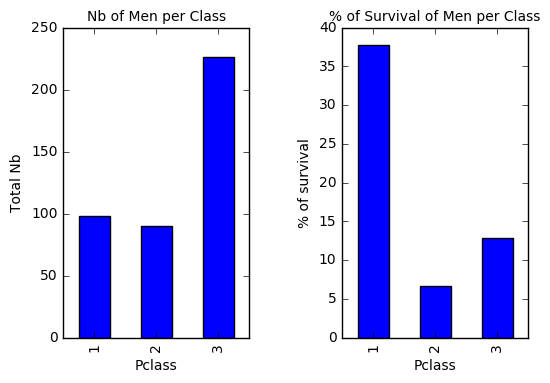

In [15]:

# Copy of the original dataset to add new column
titanic_data_age_loc=titanic_data_age.copy()
titanic_data_age_loc["is_kid"]=titanic_data_age_loc["Age"].apply(identify_kids)
titanic_data_age_loc["is_old"]=titanic_data_age_loc["Age"].apply(identify_elders)


male_adult=titanic_data_age_loc[(titanic_data_age_loc["Sex"]=="male") & (titanic_data_age_loc["is_kid"]==False)]
male_adult_surv=titanic_data_age_loc[(titanic_data_age_loc["Sex"]=="male") & (titanic_data_age_loc["is_kid"]==False)& (titanic_data_age_loc["Survived"]==1)]

male_adult_per_class=male_adult.groupby("Pclass").size()
male_adult_surv_per_class=male_adult_surv.groupby("Pclass").size()

male_adult_per_emb=male_adult.groupby("Embarked").size()
male_adult_surv_per_emb=male_adult_surv.groupby("Embarked").size()

# Percentage calculation of survival
r1=male_adult_surv_per_class/male_adult_per_class*100.
r2=male_adult_surv_per_emb/male_adult_per_emb*100.

# Bar graph survival rate per class
fig1, axarr1 =plt.subplots(1,2)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=None)
male_adult_per_class.plot(ax=axarr1[0],kind="bar")
axarr1[0].set_title("Nb of Men per Class",size=10)
axarr1[0].set_ylabel("Total Nb")
r1.plot(ax=axarr1[1],kind="bar")
axarr1[1].set_ylabel("% of survival")
axarr1[1].set_title("% of Survival of Men per Class",size=10)

# Bar graph survival rate per embarkation port
#fig2, axarr2 =plt.subplots(1,2)
#plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=None)
#male_adult_per_emb.plot(ax=axarr2[0],kind="bar")
#axarr2[0].set_title("Nb of Men per Embarkation Port",size=10)
#axarr2[0].set_ylabel("Total Nb")
#r2.plot(ax=axarr2[1],kind="bar")
#axarr2[1].set_ylabel("% of survival")
#axarr2[1].set_title("% of Survival of Men per Embarkation Port",size=10)


In [16]:
# Statistical test: men travelling in first class have a higher survival rate

muT=male_adult["Survived"].mean()
stdT=male_adult["Survived"].std()
#stdT2=male_adult["Survived"].std(ddof=0)
print muT,stdT

df=len(male_adult[male_adult["Pclass"]==1])-1
print df
mu1=male_adult[male_adult["Pclass"]==1]["Survived"].mean()
std1=male_adult[male_adult["Pclass"]==1]["Survived"].std()
print mu1,std1

SE=stdT/math.sqrt(df)
print SE

tvalue=(mu1-muT)/SE
print tvalue

0.173913043478 0.379493293077
97
0.377551020408 0.487266859344
0.038531705982
5.28494578011


### Does men having relatives on-board make their survival rate higher or lower?

To answer this question, I compared the survival rate of men who have relatives on-board with the one of men who haven't any relatives on board.  
The bar graph, I plotted doesn't show big difference in both survival rate. A conclusion may be that having relatives on board was neither an additional burden nor an asset to survived.  

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked is_kid is_old  
0      0         A/5 21171   7.2500   NaN        S  False  False  
1      0          PC 17599  71.2833   C85        C  False  False  
2      0  STON/O2. 3101282   7.9250   NaN        S  False  False  
3      0            113803  53.1000  C123        S  

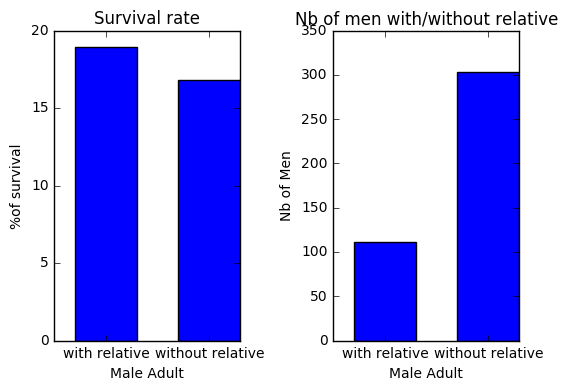

In [17]:
# restart from titanic_data_age_loc that contains is_kid and addition of nb_relative
print titanic_data_age_loc.head()
titanic_data_age_loc["nb_relative"]=titanic_data_age_loc["SibSp"]+titanic_data_age_loc["Parch"]

# Dataset filtering
male_adult_with_relative=titanic_data_age_loc[(titanic_data_age_loc["Sex"]=="male") & (titanic_data_age_loc["is_kid"]==False)& (titanic_data_age_loc["nb_relative"]>=1)]
male_adult_without_relative=titanic_data_age_loc[(titanic_data_age_loc["Sex"]=="male") & (titanic_data_age_loc["is_kid"]==False)& (titanic_data_age_loc["nb_relative"]==0)]

male_adult_with_relative_surv=male_adult_with_relative[male_adult_with_relative["Survived"]==1]
male_adult_without_relative_surv=male_adult_without_relative[male_adult_without_relative["Survived"]==1]

# Survival rate calculation
r3=float(len(male_adult_with_relative_surv))/len(male_adult_with_relative)*100.
r4=float(len(male_adult_without_relative_surv))/len(male_adult_without_relative)*100.

n1=len(male_adult_with_relative)
n2=len(male_adult_without_relative)

#Bar graph plot
fig1, axarr1 =plt.subplots(1,2)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=None)
axarr1[0].bar([1,2],[r3,r4],width=0.6)
axarr1[0].set_xlabel("Male Adult")
axarr1[0].set_ylabel("%of survival")
axarr1[0].set_title("Survival rate")
xTickMarks = ["with relative","without relative"]
axarr1[0].set_xticks([1.3,2.3])
xtickNames = axarr1[0].set_xticklabels(xTickMarks)

axarr1[1].bar([1,2],[n1,n2],width=0.6)
axarr1[1].set_xlabel("Male Adult")
axarr1[1].set_ylabel("Nb of Men")
axarr1[1].set_title("Nb of men with/without relative")
xTickMarks = ["with relative","without relative"]
axarr1[1].set_xticks([1.3,2.3])
xtickNames = axarr1[1].set_xticklabels(xTickMarks)

### Conclusion of the complete study

As a conclusion for this study, I have be able to extract some interesting information from this dataset. A large proportion of the population on board is men travelling alone. Around 3/4 of the passenger from Southampton were men travelling alone whereas half of the passenger from Cherbourg had relatives on-board. In addition passager from Cherbourg were richer (travelling in first class).  

When it comes to the question of the factors that made people more likely to survived, they are:
1. being a kid
2. being a woman
3. being a man travelling in first class
